![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical 

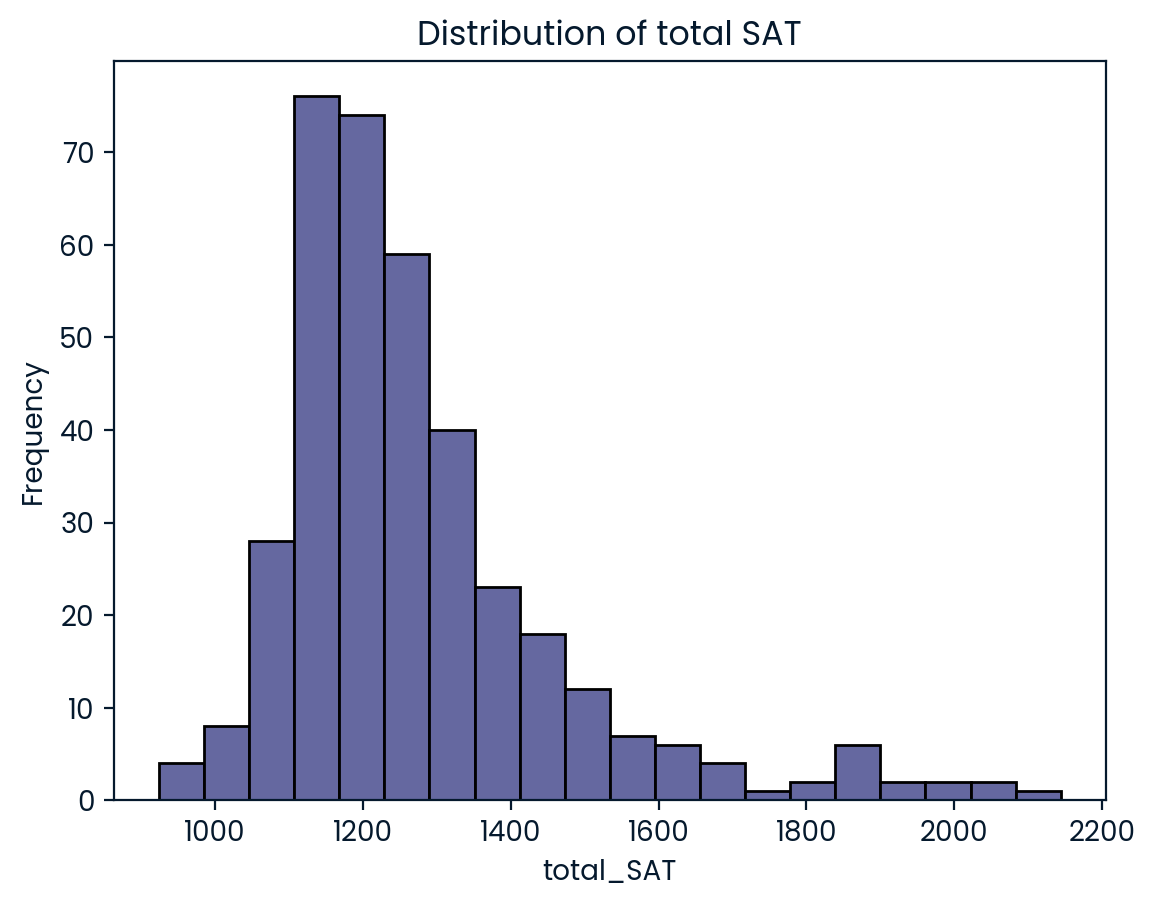

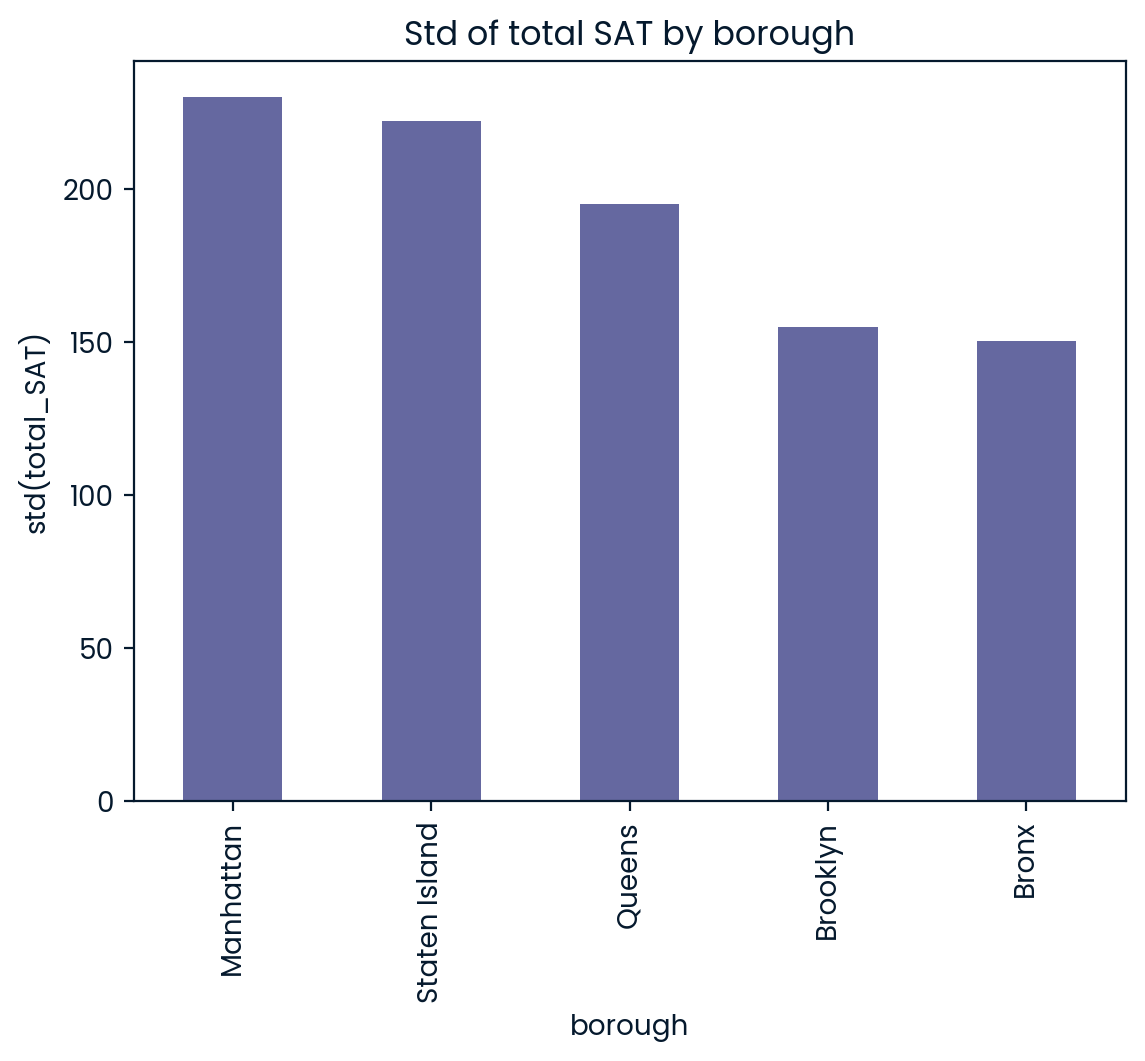

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Best schools for math:
best_math_schools = schools[schools["average_math"] >= 800 * 0.8][["school_name", "average_math"]].sort_values("average_math", ascending = False)                                                                                                     
print(best_math_schools)

# Calculate total_SAT per school:
schools["total_SAT"] = schools["average_math"] + schools["average_writing"]+ schools["average_reading"]

# The top 10 performing school:
top_10_schools = schools.sort_values("total_SAT", ascending = False)[["school_name", "total_SAT"]].head(10)
print(top_10_schools)

# NYC borough which has the highest standard deviation for total_SAT:
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
print(boroughs)

# Filtering for the largest standard deviation:
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]
print(large_std_dev)

# Rename the columns:
largest_std_dev = largest_std_dev.rename(columns = {"count": "num_schools", "mean": "average_SAT", "std":"std_SAT"})
print(largest_std_dev)

# Distribution of total SAT
schools["total_SAT"].plot(kind="hist", bins=20, edgecolor="black", title="Distribution of total SAT")
plt.xlabel("total_SAT")
plt.show()

# Std of total SAT by borough (sorted)
boroughs["std"].sort_values(ascending=False).plot(kind="bar", title="Std of total SAT by borough")
plt.ylabel("std(total_SAT)")
plt.show()
